[View in Colaboratory](https://colab.research.google.com/github/bmoretz/MSDS-MachineLearning/blob/master/Assignment_01/Assignment_01.ipynb)

In [0]:
import os
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/bmoretz/MSDS-MachineLearning/master/Assignment_01/"
SURVEY_PATH = os.path.join("datasets")
SURVEY_URL = DOWNLOAD_ROOT + "datasets/mspa-survey-data.csv"

SURVEY_FILE_PATH = os.path.join("datasets", "mspa-survey-data.csv")

def load_survey_data( survey_path = SURVEY_FILE_PATH):
    return pd.read_csv(survey_path)

# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')

In [0]:
def fetch_survey_data( survey_url = SURVEY_URL, survey_path = SURVEY_PATH):
    if not os.path.isdir( survey_path ):
        os.makedirs( survey_path )
    csv_path = os.path.join( survey_path, "mspa-survey-data.csv")

    urllib.request.urlretrieve(survey_url, csv_path)

In [0]:
# download survey data into workspace
fetch_survey_data()

# Load the CSV of response data
survey_df = load_survey_data()

# use the RespondentID as label for the rows... the index of DataFrame
survey_df.set_index('RespondentID', drop = True, inplace = True)

survey_df = survey_df.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})

In [0]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 5135740122 to 5109806898
Data columns (total 40 columns):
My_Java                             207 non-null int64
My_JS                               207 non-null int64
My_Python                           207 non-null int64
My_R                                207 non-null int64
My_SAS                              207 non-null int64
Prof_Java                           207 non-null int64
Prof_JS                             207 non-null int64
Prof_Python                         207 non-null int64
Prof_R                              207 non-null int64
Prof_SAS                            207 non-null int64
Ind_Java                            207 non-null int64
Ind_JS                              207 non-null int64
Ind_Python                          207 non-null int64
Ind_R                               207 non-null int64
Ind_SAS                             207 non-null int64
Python_Course_Interest              206 non-null float64
Fo

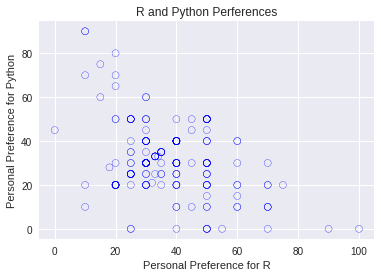

In [7]:
# single scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Perferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_Python'],
    facecolors = 'none',
    edgecolors = 'blue')

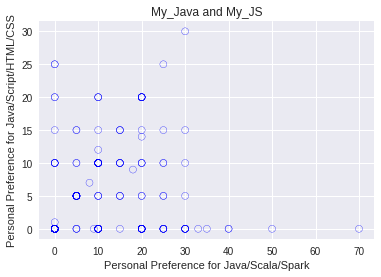

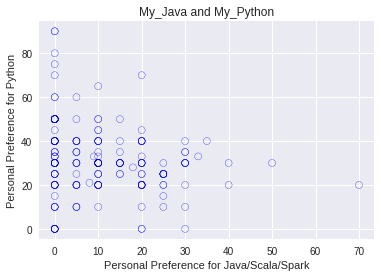

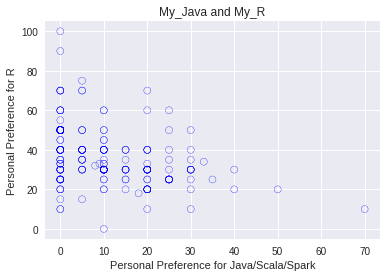

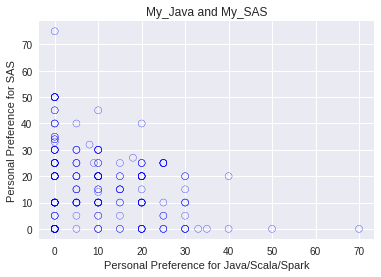

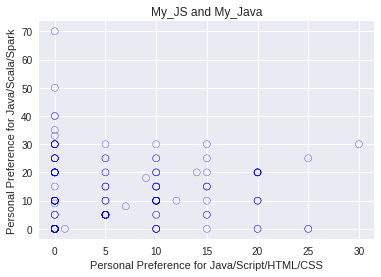

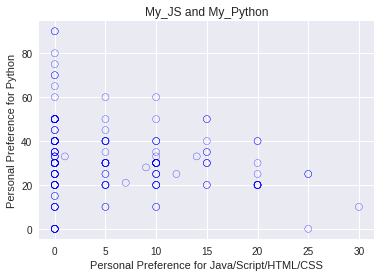

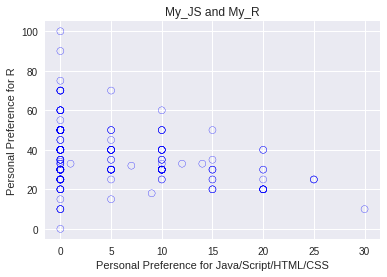

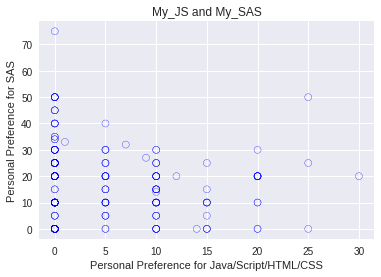

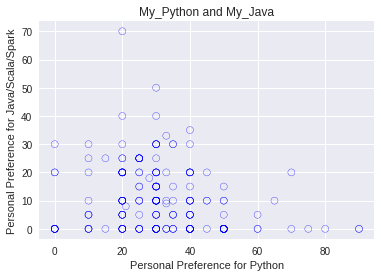

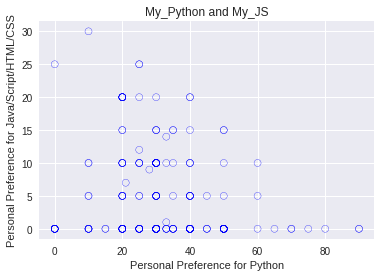

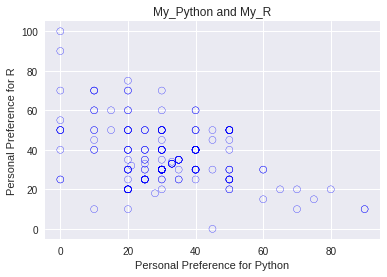

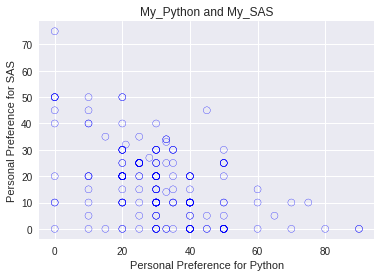

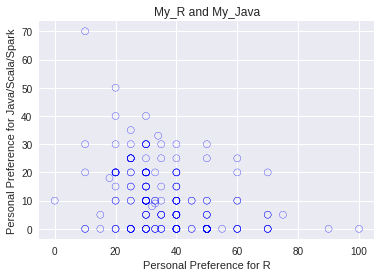

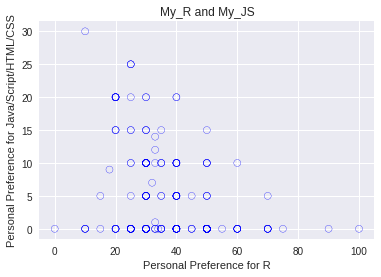

In [0]:
survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
]

# create a set of scatter plots for personal preferences
for i in range(5):
    for j in range(5):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 

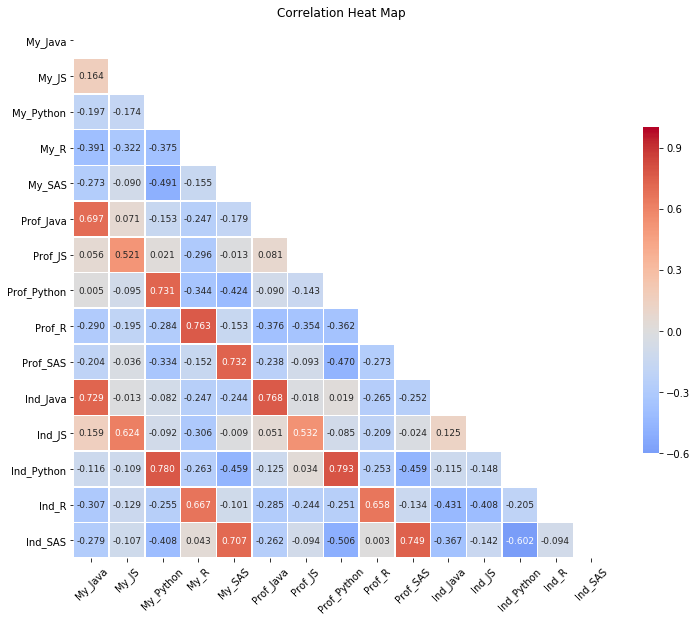

In [0]:
# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']

# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr = corr_chart(df_corr = software_df)

In [0]:
# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
print(software_df.describe())


Descriptive statistics for survey data ---------------
          My_Java       My_JS   My_Python        My_R      My_SAS   Prof_Java  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean    10.135266    4.797101   31.304348   37.125604   16.637681    9.251208   
std     11.383477    6.757764   15.570982   14.576003   13.626400   13.167505   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   20.000000   30.000000    5.000000    0.000000   
50%      9.000000    0.000000   30.000000   35.000000   15.000000    5.000000   
75%     20.000000   10.000000   40.000000   50.000000   25.000000   15.000000   
max     70.000000   30.000000   90.000000  100.000000   75.000000   80.000000   

          Prof_JS  Prof_Python      Prof_R    Prof_SAS    Ind_Java  \
count  207.000000   207.000000  207.000000  207.000000  207.000000   
mean     5.840580    30.028986   36.415459   18.463768   11.942029   
std 

In [0]:
# descriptive statistics for one variable
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe())


Descriptive statistics for courses completed ---------------
count    187.000000
mean       6.342246
std        3.170849
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Courses_Completed, dtype: float64


In [0]:
# ----------------------------------------------------------
# transformation code added with version v005
# ----------------------------------------------------------
# transformations a la Scikit Learn
# documentation at http://scikit-learn.org/stable/auto_examples/
#                  preprocessing/plot_all_scaling.html#sphx-glr-auto-
#                  examples-preprocessing-plot-all-scaling-py
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df['Courses_Completed'].dropna()

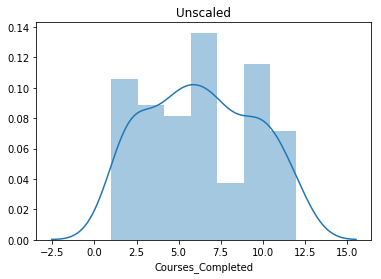

In [0]:
# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html
unscaled = sns.distplot(X).set_title('Unscaled')

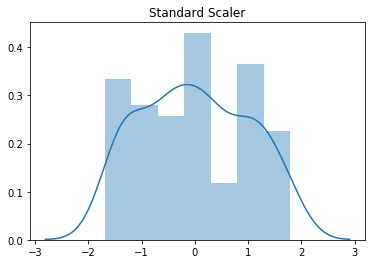

In [0]:
std_scaler = sns.distplot(StandardScaler().fit_transform(np.array(X).reshape(-1,1))).set_title('Standard Scaler')

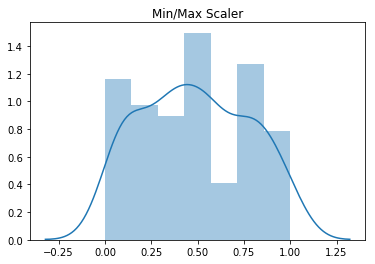

In [0]:
min_max_scaler = sns.distplot(MinMaxScaler().fit_transform(np.array(X).reshape(-1,1))).set_title('Min/Max Scaler')

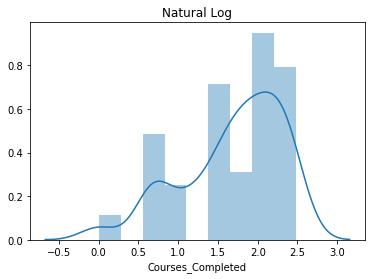

In [0]:
ln = sns.distplot(np.log(X)).set_title('Natural Log')

In [0]:
survey_df.describe()

,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest,Courses_Completed
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,206.000000,200.000000,203.000000,200.000000,187.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681,9.251208,5.840580,30.028986,36.415459,18.463768,11.942029,6.966184,29.772947,32.434783,18.884058,73.529126,58.045000,55.201970,53.630000,6.342246
std,11.383477,6.757764,15.570982,14.576003,13.626400,13.167505,10.812555,19.144802,20.847606,18.831841,14.706399,10.030721,17.959816,15.912209,19.137623,29.835429,32.588079,34.147954,33.539493,3.170849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000,0.000000,0.000000,20.000000,25.000000,0.000000,0.000000,0.000000,20.000000,22.500000,0.000000,53.000000,29.500000,25.000000,21.500000,4.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000,5.000000,0.000000,30.000000,33.000000,15.000000,5.000000,0.000000,30.000000,30.000000,15.000000,82.500000,60.000000,60.000000,51.500000,6.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000,15.000000,10.000000,40.000000,50.000000,30.000000,20.000000,10.000000,40.000000,40.000000,30.000000,100.000000,89.250000,85.000000,80.250000,9.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000,80.000000,100.000000,100.000000,100.000000,100.000000,70.000000,50.000000,95.000000,85.000000,100.000000,100.000000,100.000000,100.000000,100.000000,12.000000


In [0]:
# helper to get columns of interest
def lang_cols( df, survey_type ):
    
    lookup = { "Personal" : "My_",
               "Industry" : "Ind_",
               "Professional" : "Prof_"}
    
    prefix = lookup.get(survey_type)
    
    cols = [col for col in df if col.startswith(prefix)]
    
    normalized = df[ cols ].rename(columns={col: col.replace(prefix, "") for col in df.columns})
    
    return normalized.reset_index(drop=True)
    

In [0]:
# Lets look at the distribution of scores for students preferences of various languages.

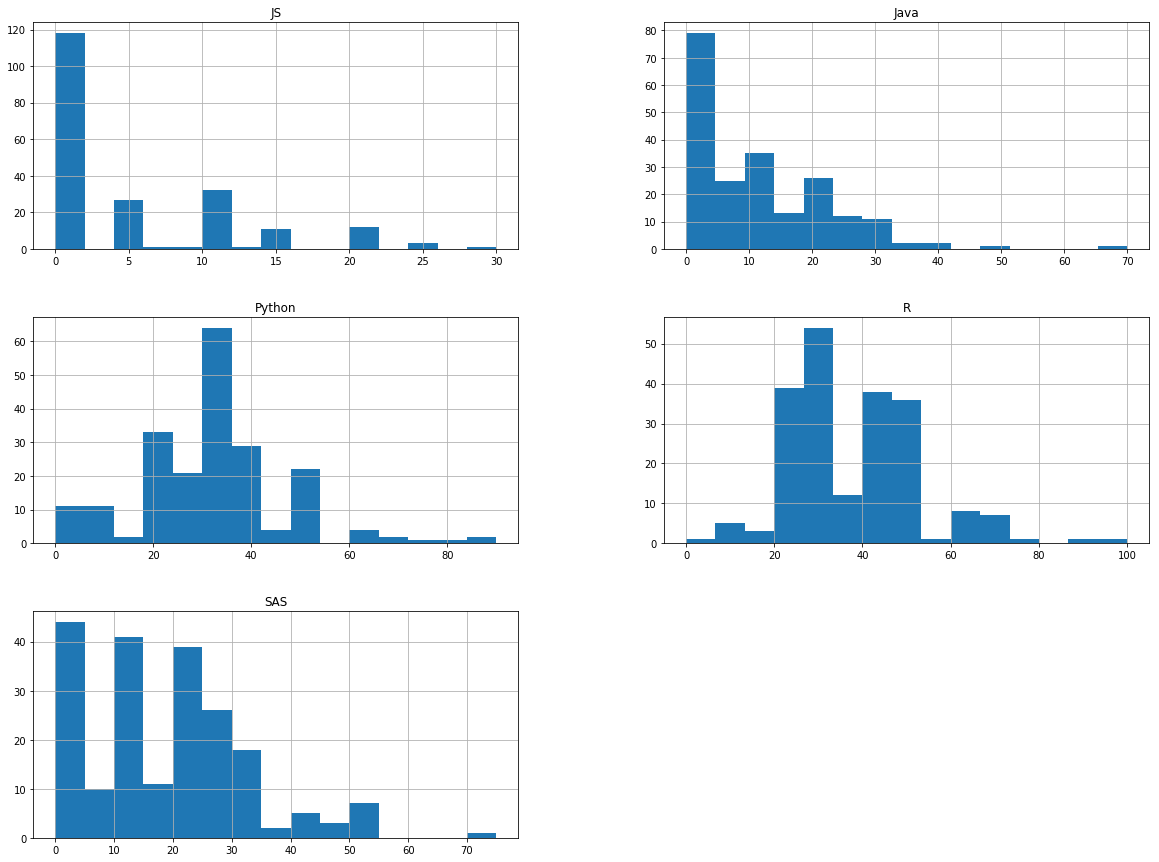

In [0]:
personal = lang_cols(survey_df, 'Personal')
personal.hist(bins = 15, figsize = (20, 15))
plt.show()

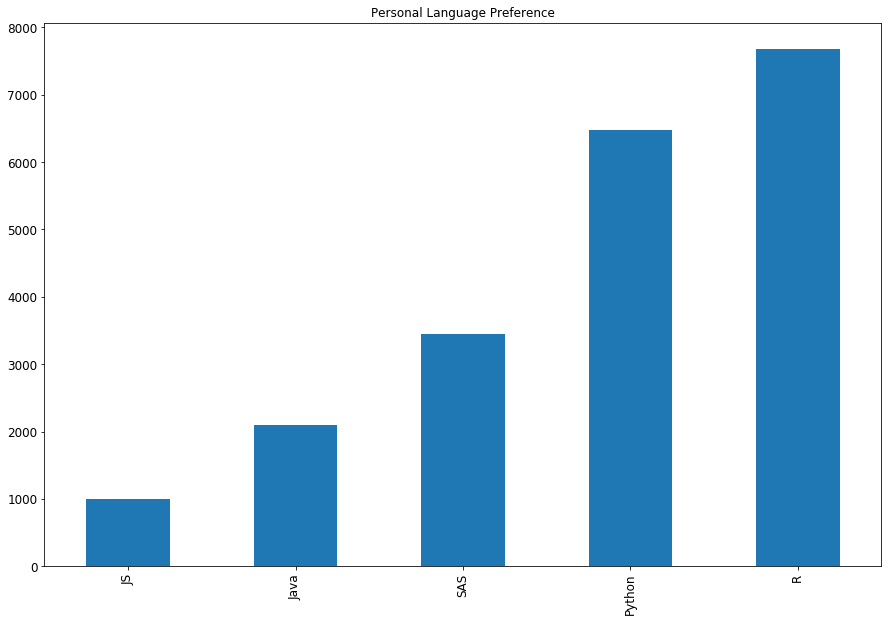

In [0]:
# Cum values by language
per_total = personal.sum().sort_values()
per_total_plot = per_total.plot(kind='bar', title ="Personal Language Preference", figsize=(15, 10), legend=False, fontsize=12)

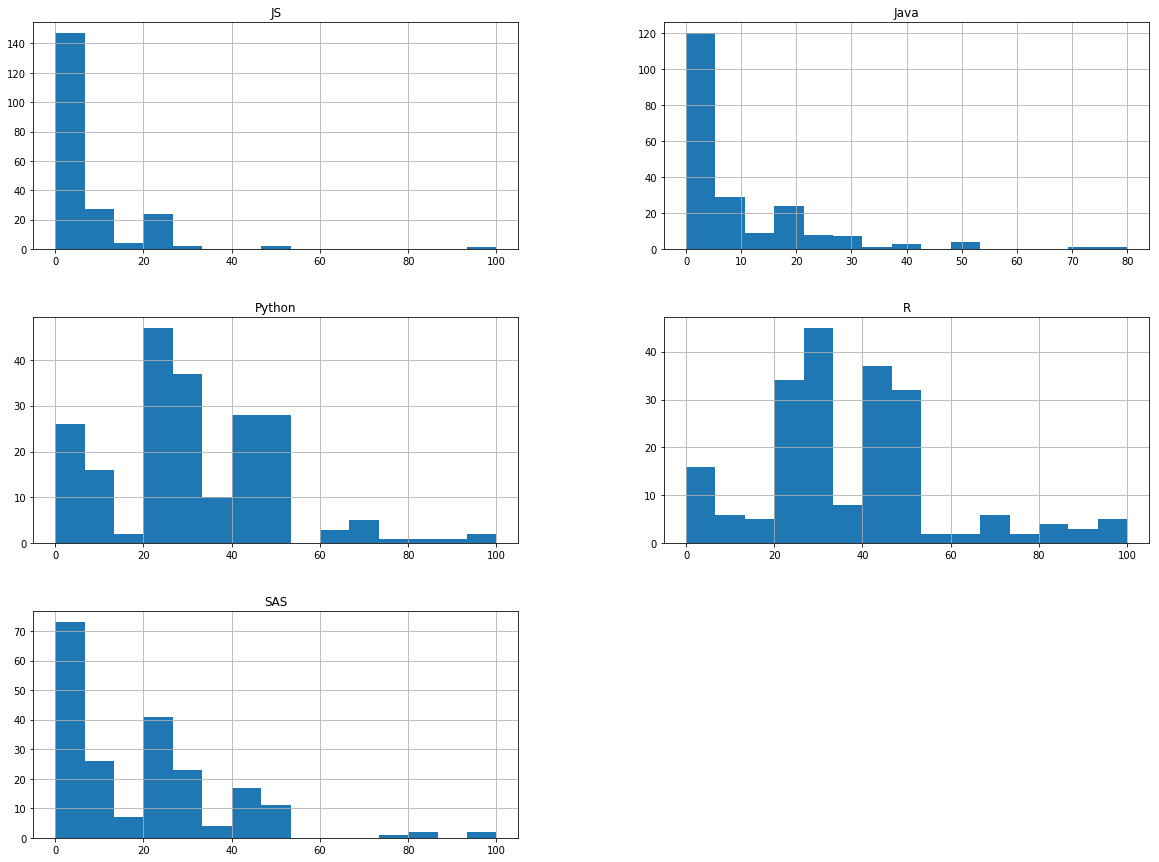

In [0]:
# professional distribution
professional = lang_cols(survey_df, 'Professional')
professional.hist(bins = 15, figsize = (20, 15))
plt.show()

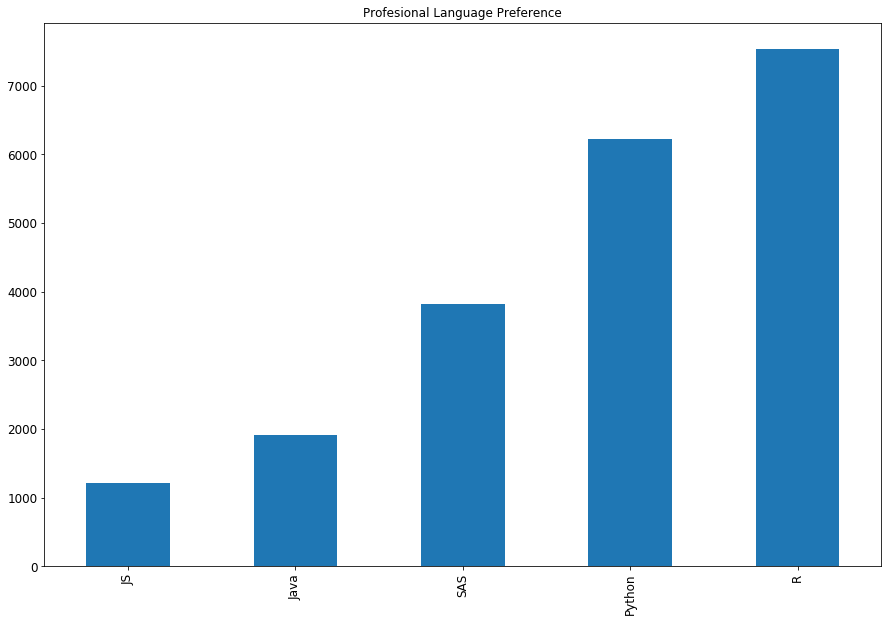

In [0]:
# professional total
prof_total = professional.sum().sort_values()
prof_toal_plot = prof_total.plot(kind='bar', title ="Profesional Language Preference", figsize=(15, 10), legend=False, fontsize=12)

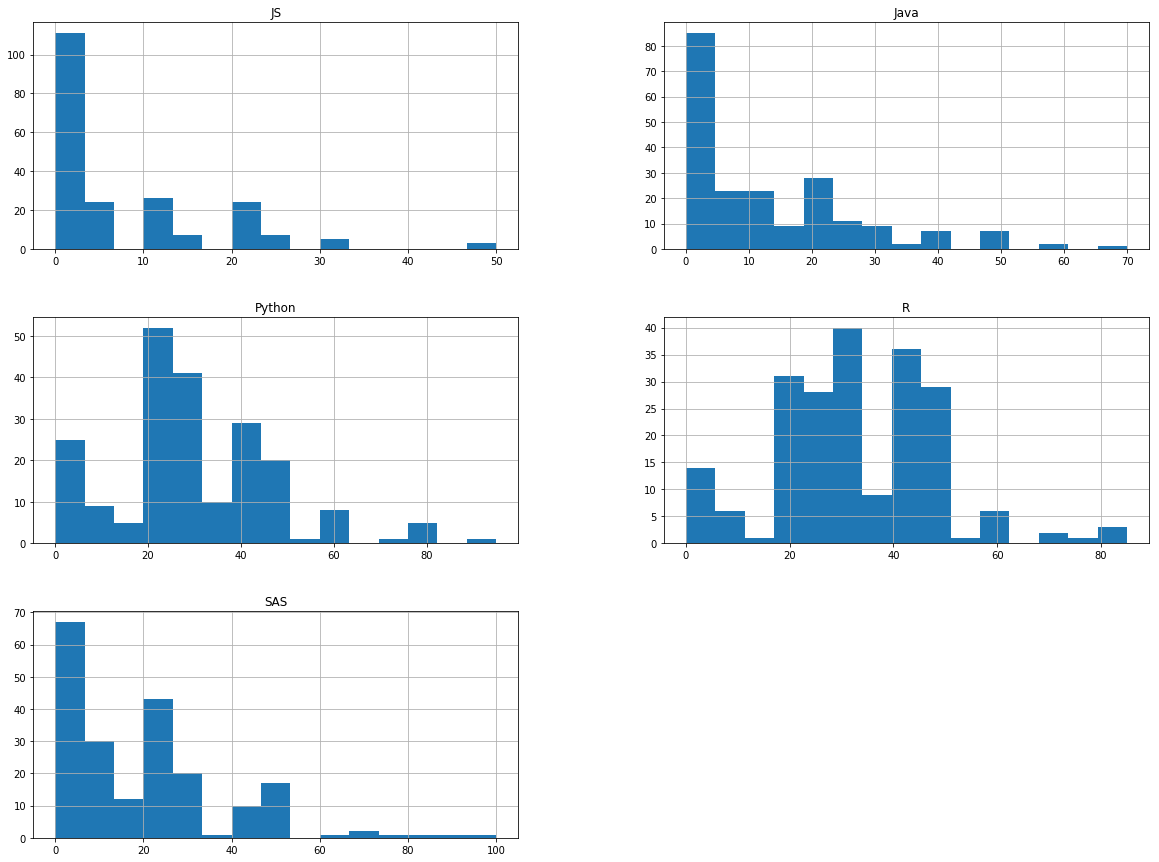

In [0]:
# industry distribution
industry = lang_cols(survey_df, 'Industry')
industry.hist(bins = 15, figsize = (20, 15))
plt.show()

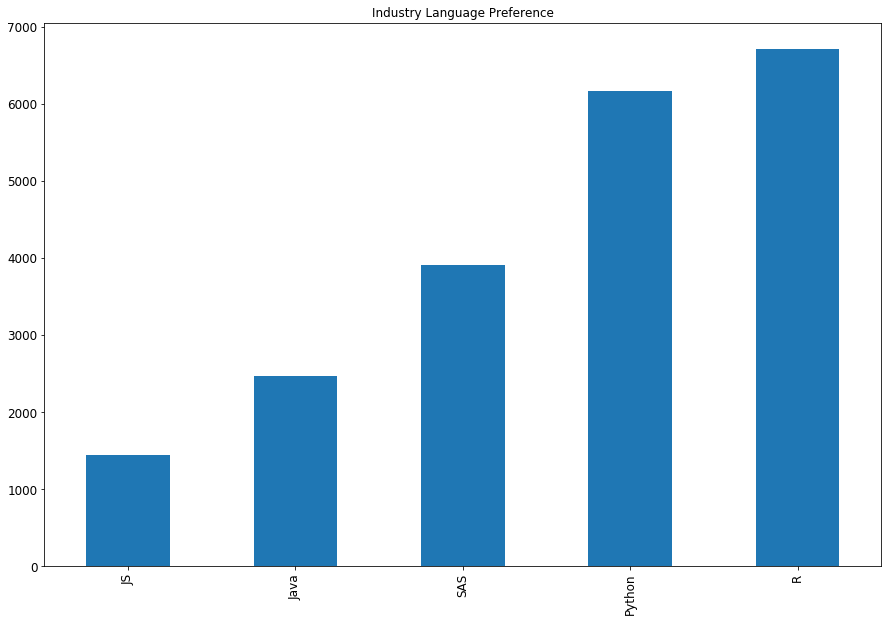

In [0]:
# industry total
ind_total = industry.sum().sort_values()
ind_total_plot = ind_total.plot(kind='bar', title ="Industry Language Preference", figsize=(15, 10), legend=False, fontsize=12)

In [0]:
# let's combine all 3 so we can quickly compare the 3 categories.
combined = pd.concat( [ per_total, prof_total, ind_total ], axis = 1, join = 'inner' )
combined.columns = ['Personal', 'Professional', 'Industry']

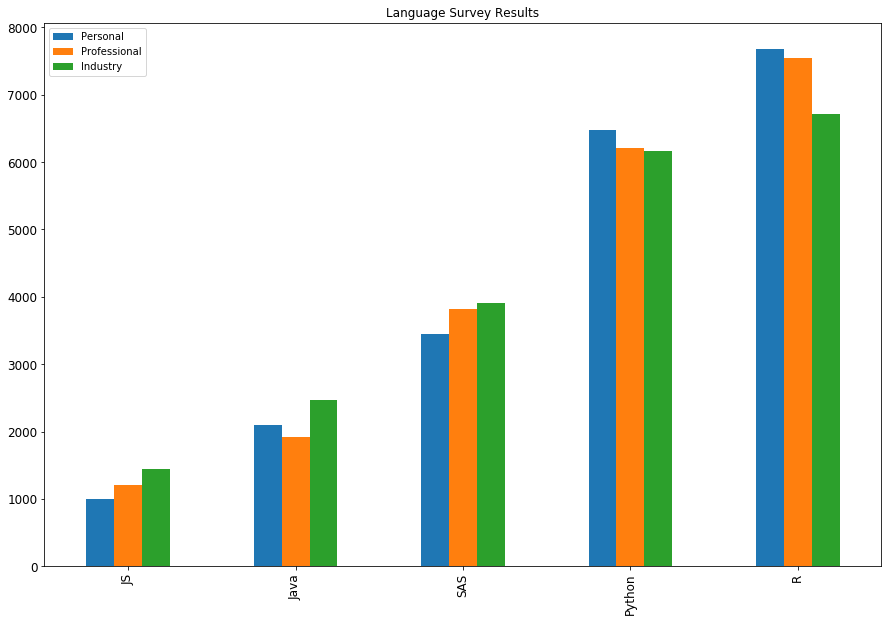

In [0]:
combined_plot = combined.plot(kind='bar', title ="Language Survey Results", figsize=(15, 10), legend=True, fontsize=12)

In [0]:
# Now let's look at the course related survey data.

In [0]:
# helper to get columns of interest
def interest_cols( df ):
    
    suffix = "_Course_Interest"
    cols = [col for col in df if col.endswith(suffix)]
    
    normalized = df[ cols ].rename(columns={col: col.replace(suffix, "") for col in df.columns})
    
    return normalized.reset_index(drop=True)

In [0]:
interest = interest_cols(survey_df)

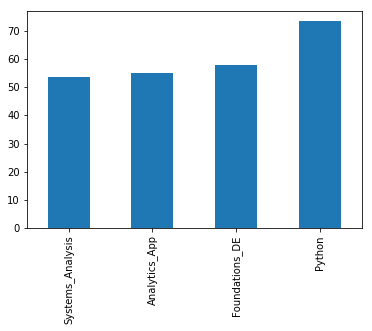

In [0]:
interest.mean().sort_values().plot(kind='bar')
plt.show()

In [0]:
suffix = "_Course_Interest"
cols = [col for col in survey_df if col.endswith(suffix)]
    
by_completed = survey_df.groupby("Courses_Completed")[ cols ].mean()
by_completed = by_completed.rename(columns={col: col.replace(suffix, "") for col in by_completed.columns})

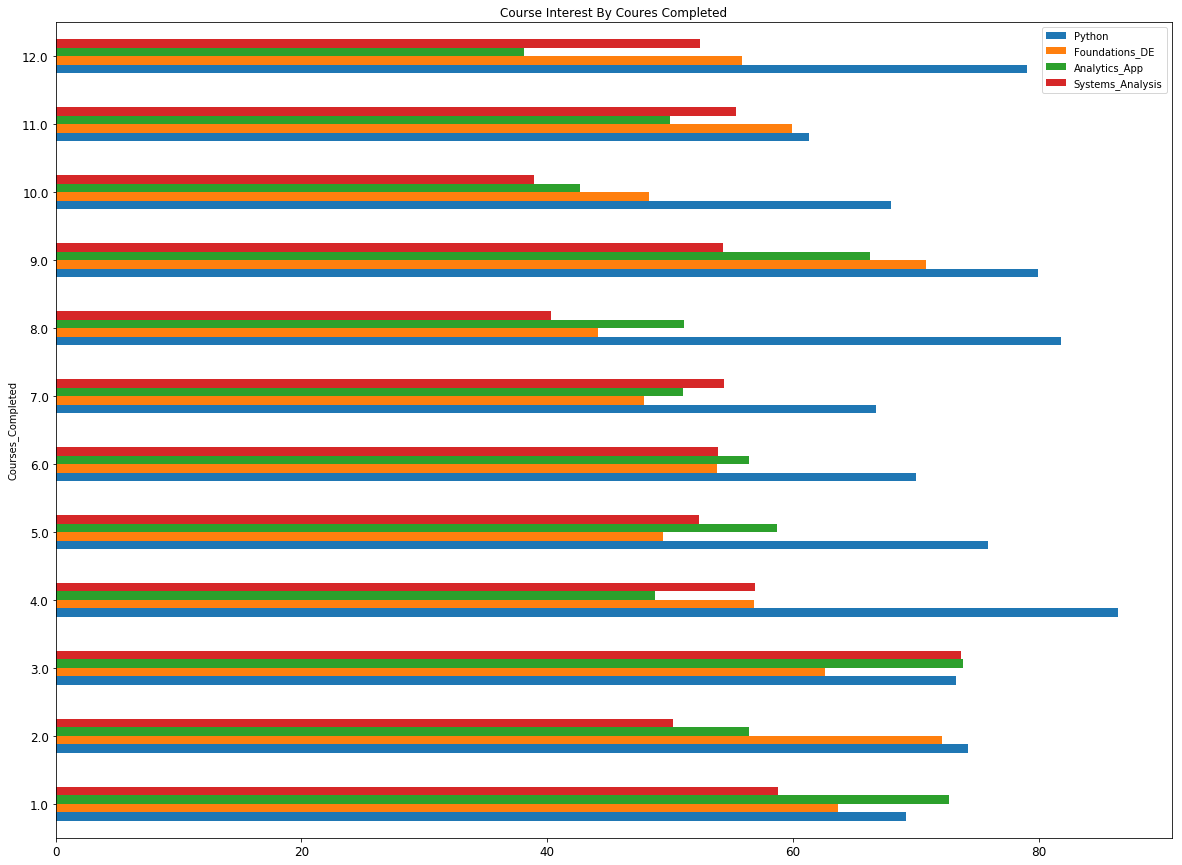

In [0]:
# Consolidated into 1 charrt. Pretty busy, difficult to see clear pattern.
by_completed_bar_composite = by_completed.plot(kind='barh', title ="Course Interest By Coures Completed", figsize=(20, 15), legend=True, fontsize=12)

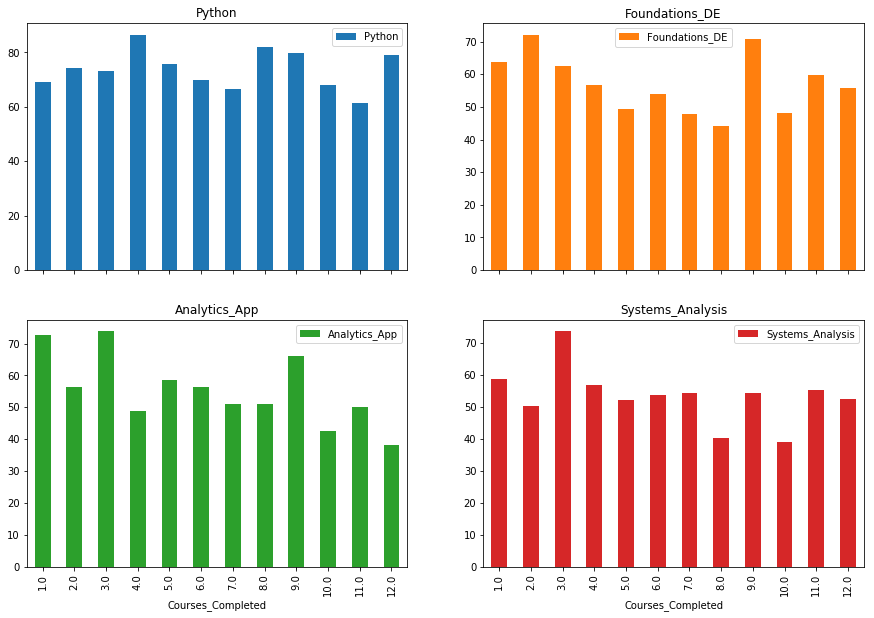

In [0]:
# Much cleaner presentation. We can clearly see the interest in a Python course is heavy no matter how far into the program you are.
# the others are more variate.
completed_by_bar_seperate = by_completed.plot( kind='bar', subplots = True, layout=(2,2), figsize=(15,10))